Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
- K-Means:

Partitional clustering (splits data into k clusters).

Requires k to be specified in advance.

Efficient for large datasets.

    - Use Case: Customer segmentation in retail.

- Hierarchical Clustering:

Builds a tree (dendrogram) of clusters.

No need to predefine number of clusters.

Better for small datasets and visualization.

    - Use Case: Gene sequence similarity analysis in bioinformatics.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.


- Purpose: Measures how well each data point fits within its cluster compared to other clusters.

- Range: -1 to 1

  - 1: Perfectly clustered

   - 0: Overlap between clusters

   - -1: Wrong cluster assignment

Use: Higher score = better clustering quality.

Example: Used to choose optimal number of clusters in K-Means.

Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?
- Core Parameters of DBSCAN:

- 1) eps (ε):

Maximum distance between two points to be considered neighbors.

Small eps: Many small clusters/noise.

Large eps: Fewer, larger clusters.

- 2) min_samples:

Minimum number of points needed to form a dense region (core point).

Low value: More clusters, less strict.

High value: Fewer clusters, more strict.

- Impact:

These parameters define density.

Control whether points become core points, border points, or noise in clustering.

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- Feature Scaling Importance:

- Reason: Both K-Means and DBSCAN rely on distance metrics (e.g., Euclidean).

If features have different scales, larger-scale features dominate distance calculation, leading to biased clusters.

- Solution: Apply Standardization (Z-score) or Normalization (Min-Max) before clustering to ensure all features contribute equally.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- Definition: A technique to find the optimal number of clusters (k) in K-Means.

- How it works:

Plot Within-Cluster Sum of Squares (WCSS) vs k.

WCSS decreases as k increases, but after a point, the decrease becomes small (forms an “elbow”).

- Optimal k: The point where the curve bends (elbow) → balance between compactness and simplicity.

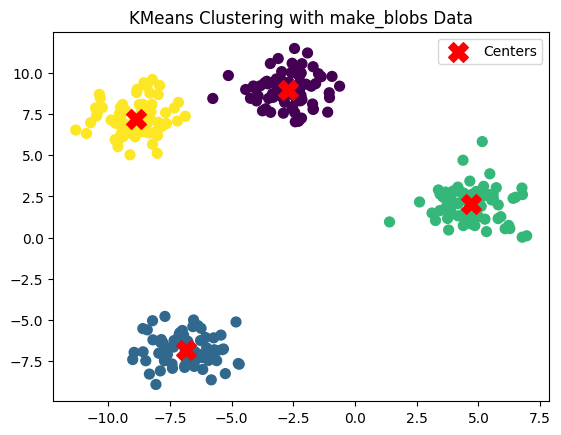

In [1]:
# Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
# apply KMeans clustering, and visualize the results with cluster centers.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title("KMeans Clustering with make_blobs Data")
plt.legend()
plt.show()


In [2]:
# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
# model. Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
data = load_wine()
X = data.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise: label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


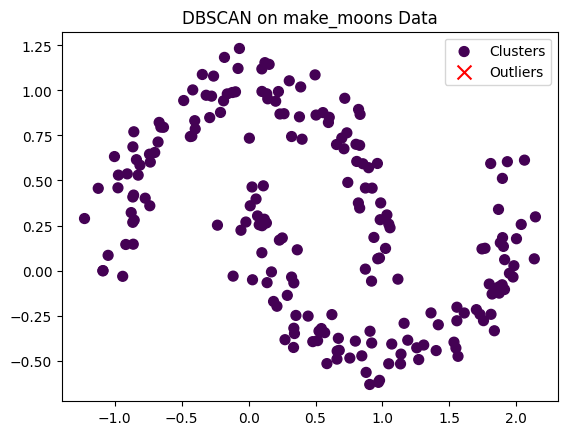

In [3]:

# Question 8: Generate moon-shaped synthetic data using
# make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
# the plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (label = -1)
outliers = labels == -1

# Plot clusters and outliers
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis', s=50, label="Clusters")
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='x', s=100, label="Outliers")
plt.title("DBSCAN on make_moons Data")
plt.legend()
plt.show()


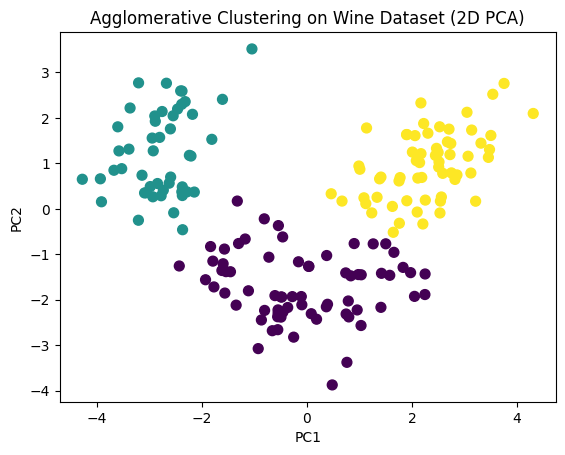

In [4]:
# Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
# Agglomerative Clustering and visualize the result in 2D with a scatter plot

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
data = load_wine()
X = data.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

- Choose clustering algorithm:

K-Means: Efficient for large datasets, works well if clusters are roughly spherical.

DBSCAN or Hierarchical: If expecting irregular-shaped clusters or outliers in purchase behavior.

- Data preprocessing:

Handle missing values (mean/mode imputation).

Scale features (StandardScaler/MinMaxScaler) to make distances meaningful.

Encode categorical features using one-hot encoding.

- Determine number of clusters:

Use Elbow Method or Silhouette Score for K-Means.

For DBSCAN, tune eps and min_samples.

- Business benefit:

Marketing can target promotions based on customer segments.

Identify high-value, frequent, or niche buyers.

Improve campaign ROI and customer retention by personalized strategies.